# The Assignment

In [59]:
# import the numpy and the matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# read the CSV file into the two-dimensional array "data"
# using numpy's function genfromtxt
data = np.genfromtxt('breast-cancer-wisconsin.data.csv', delimiter=',')

In [61]:
# print the shape of the array "data"
data.shape

(699, 11)

In [62]:
# print the first 5 rows of the array "data"
print("First 5 rows of the array data:")
print(data[:5])

First 5 rows of the array data:
[[1.000025e+06 5.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 4.000000e+00 5.000000e+00
  7.000000e+00 1.000000e+01 3.000000e+00 2.000000e+00 1.000000e+00
  2.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00 2.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]
 [1.016277e+06 6.000000e+00 8.000000e+00 8.000000e+00 1.000000e+00
  3.000000e+00 4.000000e+00 3.000000e+00 7.000000e+00 1.000000e+00
  2.000000e+00]
 [1.017023e+06 4.000000e+00 1.000000e+00 1.000000e+00 3.000000e+00
  2.000000e+00 1.000000e+00 3.000000e+00 1.000000e+00 1.000000e+00
  2.000000e+00]]


In [63]:
# Assign to the array "X" the features from the array "data"
# do we need to ignore any feature (column)?
X = data[:, 1:-1] # All columns except the first and  last one
print(X.shape)

(699, 9)


In [64]:
# Assign to the array "y" the labels from the array "data"
# Do we need to adjust the values in "y"?
y = data[:, -1]
y=y.reshape(-1, 1)
print(y.shape)
y = np.where(y == 2, 0, 1)

(699, 1)


## Defining function for One hidden layer Neural Network with different cost functions

In [65]:
def g1(x):
    return 1. / (1 + np.exp(-x))

def g2(x):
    return 1. / (1 + np.exp(-x))

def g1_prime(x):
    return g1(x) * (1 - g1(x))

def cross_entropy_cost(y, A2):
    m = y.shape[1]
    return -np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2)) / m

def rms_cost(y, A2):
    m = y.shape[1]
    return np.sqrt(np.sum((y - A2) ** 2) / m)

In [66]:
def NN(X, y, n_h, n_y, alpha, iterations, cost_type="cross_entropy"):
    stage_1 = iterations // 2
    alpha2 = alpha / 2.
    stage_2 = iterations // 1.75
    alpha3 = alpha / 4.
    stage_3 = iterations // 1.5
    alpha4 = alpha / 8.
    
    cost_list = [[], []]
    m = X.shape[1]
    n_x = X.shape[0]
    
    W1 = np.random.randn(n_h, n_x) * 0.1
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        
        if i % 100 == 0:
            if cost_type == "cross_entropy":
                cost = cross_entropy_cost(y, A2)
            elif cost_type == "rms":
                cost = rms_cost(y, A2)
            else:
                raise ValueError("Invalid cost_type. Use 'cross_entropy' or 'rms'.")
            
            cost_list[0].append(i)
            cost_list[1].append(cost)
        
        dZ2 = A2 - y
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1)
        
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
        
        if i > stage_1:
            alpha = alpha2
        elif i > stage_2:
            alpha = alpha3
        elif i > stage_3:
            alpha = alpha4
    
    return W1, b1, W2, b2, cost_list

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [68]:
def train_evaluate_neural_network(X, y, alpha, iterations, n_h, test_size, random_state, cost_type="cross_entropy"):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Train the neural network using your existing 'NN' function
    W1, b1, W2, b2, cost_list = NN(X_train.T, y_train.T, n_h, 1, alpha, iterations, cost_type=cost_type)

    # Plot the cost function
    plt.plot(cost_list[0][1:], cost_list[1][1:], 'go')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Iterations ({cost_type} cost)')
    plt.show()

    # Make predictions on the test set
    Z1 = np.dot(W1, X_test.T) + b1
    A1 = g1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = g2(Z2)
    predictions = A2.copy()
    predictions[A2 < 0.5] = 0
    predictions[A2 >= 0.5] = 1

    # Calculate and display confusion matrix and classification report
    confusion = confusion_matrix(y_test.T[0], predictions[0])
    report = classification_report(y_test.T[0], predictions[0])

    return confusion, report

### One hidden Layer implementation with 8 neurons 

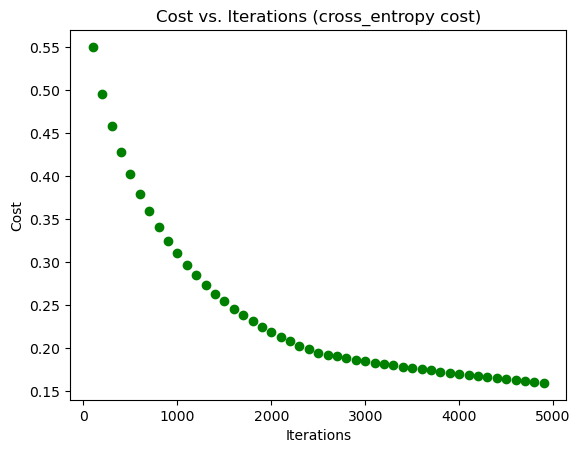

Confusion Matrix:
[[88  4]
 [ 6 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.91      0.88      0.89        48

    accuracy                           0.93       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140



In [69]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.2, random_state=42, cost_type="cross_entropy")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### One hidden Layer implementation with 8 neurons -RMS as Loss Function

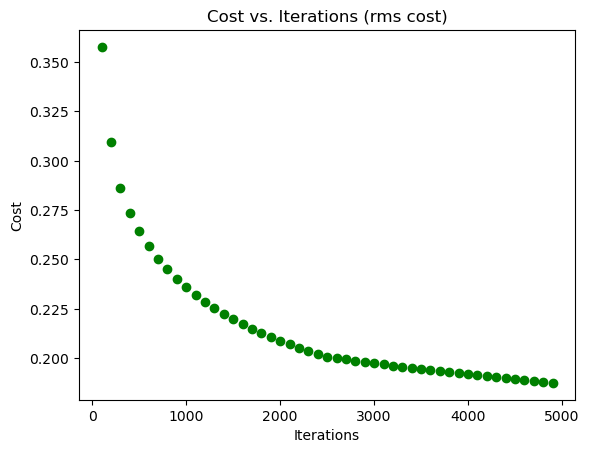

Confusion Matrix:
[[88  4]
 [ 6 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.91      0.88      0.89        48

    accuracy                           0.93       140
   macro avg       0.92      0.92      0.92       140
weighted avg       0.93      0.93      0.93       140



In [70]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.2, random_state=42, cost_type="rms")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### One hidden Layer implementation with 5 neurons 

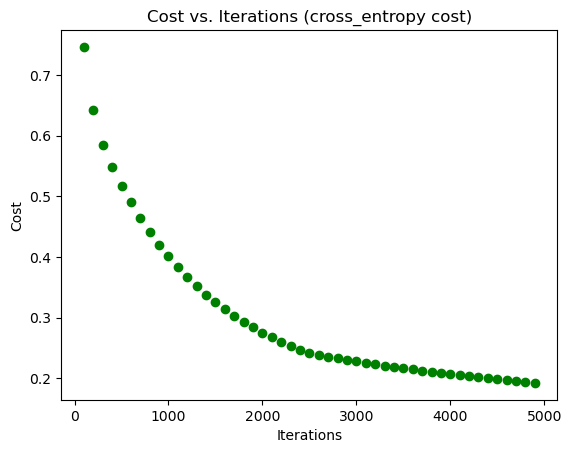

Confusion Matrix:
[[88  4]
 [ 8 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        92
           1       0.91      0.83      0.87        48

    accuracy                           0.91       140
   macro avg       0.91      0.89      0.90       140
weighted avg       0.91      0.91      0.91       140



In [71]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=5, test_size=0.2, random_state=42, cost_type="cross_entropy")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### One hidden Layer implementation with 10 neurons 

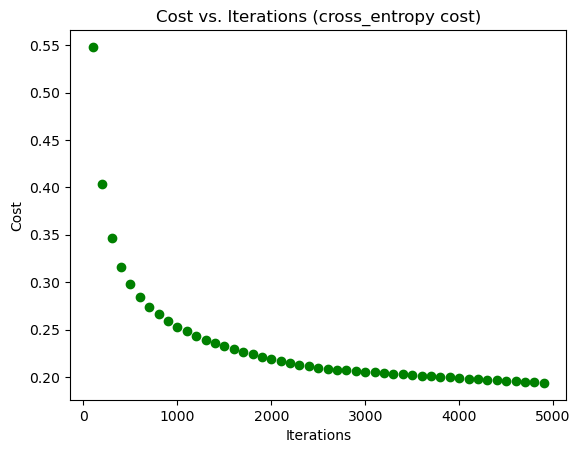

Confusion Matrix:
[[85  7]
 [ 8 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        92
           1       0.85      0.83      0.84        48

    accuracy                           0.89       140
   macro avg       0.88      0.88      0.88       140
weighted avg       0.89      0.89      0.89       140



In [72]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=10, test_size=0.2, random_state=42, cost_type="cross_entropy")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### One hidden Layer implementation with 8 neurons for split into 60%- 40%

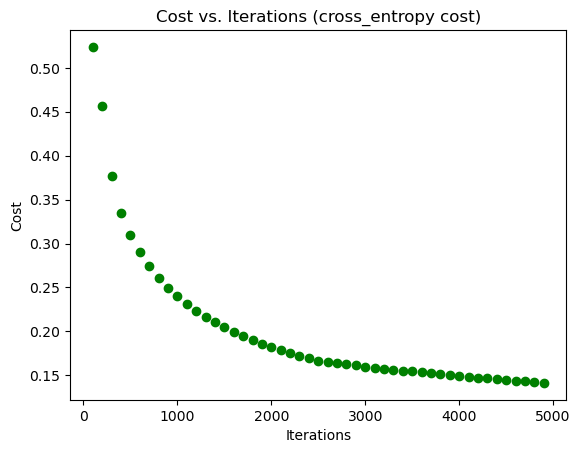

Confusion Matrix:
[[174   9]
 [  8  89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       183
           1       0.91      0.92      0.91        97

    accuracy                           0.94       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.94      0.94      0.94       280



In [73]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.4, random_state=42, cost_type="cross_entropy")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### One hidden Layer implementation with 8 neurons for split into 90%- 10%

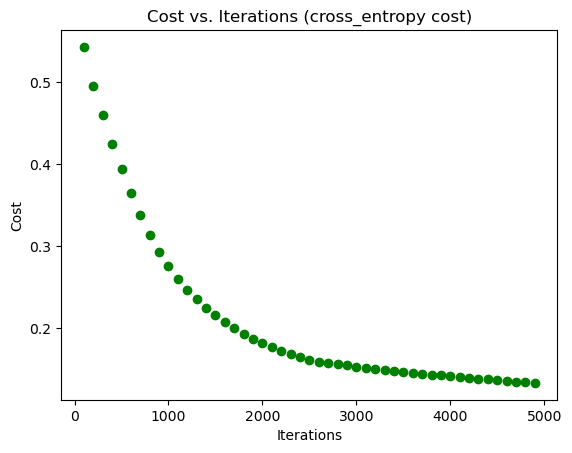

Confusion Matrix:
[[44  2]
 [ 2 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.92      0.92      0.92        24

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



In [74]:
confusion, report = train_evaluate_neural_network(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.1, random_state=42, cost_type="cross_entropy")
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

# Using batches to train the model

In [97]:
def NN1(X, y, n_h, n_y, alpha, iterations, batch_size):
    stage_1 = iterations // 2
    alpha2 = alpha / 2.
    stage_2 = iterations // 1.75
    alpha3 = alpha / 4.
    stage_3 = iterations // 1.5
    alpha4 = alpha / 8.
    
    cost_list = [[], []]
    m = X.shape[1]
    n_x = X.shape[0]
    
    W1 = np.random.randn(n_h, n_x) * 0.1
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    for i in range(iterations):
        for j in range(0, m, batch_size):
            X_batch = X[:, j:j+batch_size]
            y_batch = y[:, j:j+batch_size]
            
            Z1 = np.dot(W1, X_batch) + b1
            A1 = g1(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = g2(Z2)
        
            if i % 100 == 0:
                cost = cross_entropy_cost(y_batch, A2)
                cost_list[0].append(i)
                cost_list[1].append(cost)
        
            dZ2 = A2 - y_batch
            dW2 = (1 / batch_size) * np.dot(dZ2, A1.T)
            db2 = (1 / batch_size) * np.sum(dZ2)
            dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
            dW1 = (1 / batch_size) * np.dot(dZ1, X_batch.T)
            db1 = (1 / batch_size) * np.sum(dZ1)
        
            W2 = W2 - alpha * dW2
            b2 = b2 - alpha * db2
            W1 = W1 - alpha * dW1
            b1 = b1 - alpha * db1
        
        if i > stage_1:
            alpha = alpha2
        elif i > stage_2:
            alpha = alpha3
        elif i > stage_3:
            alpha = alpha4
    
    return W1, b1, W2, b2, cost_list

In [98]:
def train_evaluate_neural_network_batch(X, y, alpha, iterations, n_h, test_size, random_state, batch_size):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Train the neural network using your existing 'NN' function
    W1, b1, W2, b2, cost_list = NN1(X_train.T, y_train.T, n_h, 1, alpha, iterations, batch_size)

    # Plot the cost function
    plt.plot(cost_list[0][1:], cost_list[1][1:], 'go')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Iterations)')
    plt.show()

    # Make predictions on the test set
    Z1 = np.dot(W1, X_test.T) + b1
    A1 = g1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = g2(Z2)
    predictions = A2.copy()
    predictions[A2 < 0.5] = 0
    predictions[A2 >= 0.5] = 1

    # Calculate and display confusion matrix and classification report
    confusion = confusion_matrix(y_test.T[0], predictions[0])
    report = classification_report(y_test.T[0], predictions[0])

    return confusion, report

### Batch Size of 32 with 8 hidden layer neurons 

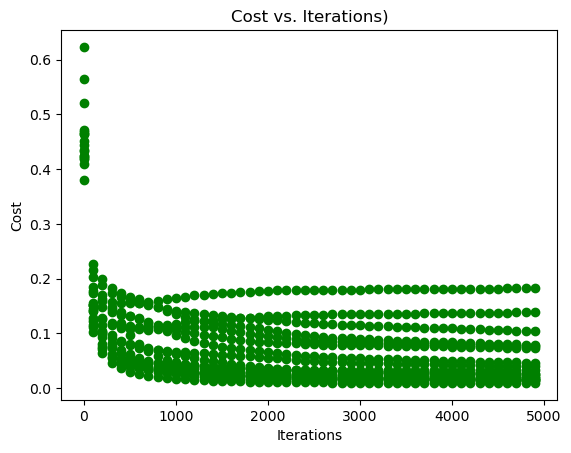

Confusion Matrix:
[[89  3]
 [ 3 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        92
           1       0.94      0.94      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [99]:
confusion, report = train_evaluate_neural_network_batch(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.2, random_state=42, batch_size=32)
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### Batch Size of 64 with 8 hidden layer neurons 

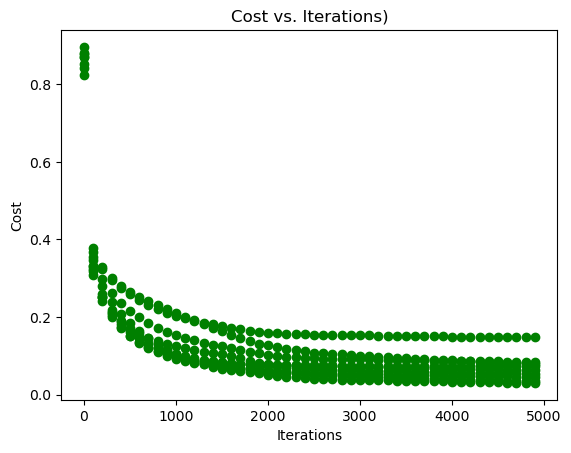

Confusion Matrix:
[[89  3]
 [ 4 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



In [100]:
confusion, report = train_evaluate_neural_network_batch(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.2, random_state=42, batch_size=64)
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)

### Batch Size of 100 with 8 hidden layer neurons 

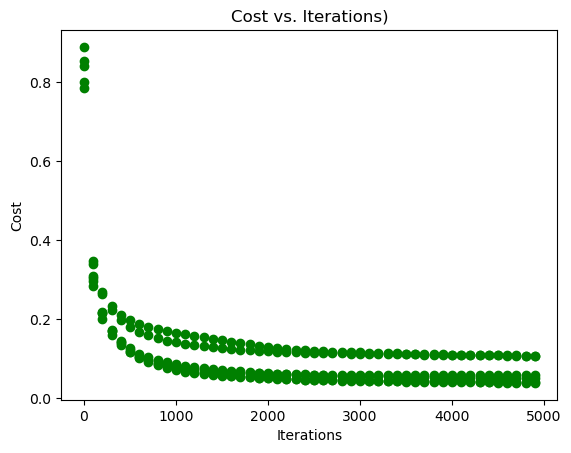

Confusion Matrix:
[[89  3]
 [ 4 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



In [101]:
confusion, report = train_evaluate_neural_network_batch(X, y, alpha=0.01, iterations=5000, n_h=8, test_size=0.2, random_state=42, batch_size=100)
# Print the results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(report)